插值与曲线拟合

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
y = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

m_list = np.zeros(len(x))
c_list = np.zeros(len(x))

for i in range(len(x)-1):
    
    m = (y[i+1]-y[i])/(x[i+1]-x[i])
    c1 = (y[i]-m*x[i])
    c2 = (y[i+1]-m*x[i+1])

    print("For (%.1f, %.1f) and (%.1f, %.1f), m = %.2f and c1 = %.2f, c2 = %.2f."
             % (x[i], y[i], x[i+1], y[i+1], m, c1, c2))
    
    m_list[i] = m
    c_list[i] = c1

For (0.5, 0.5) and (2.0, 0.4), m = -0.07 and c1 = 0.53, c2 = 0.53.
For (2.0, 0.4) and (4.0, 0.3), m = -0.05 and c1 = 0.50, c2 = 0.50.
For (4.0, 0.3) and (5.0, 0.1), m = -0.20 and c1 = 1.10, c2 = 1.10.
For (5.0, 0.1) and (7.0, 0.9), m = 0.40 and c1 = -1.90, c2 = -1.90.
For (7.0, 0.9) and (9.0, 0.8), m = -0.05 and c1 = 1.25, c2 = 1.25.


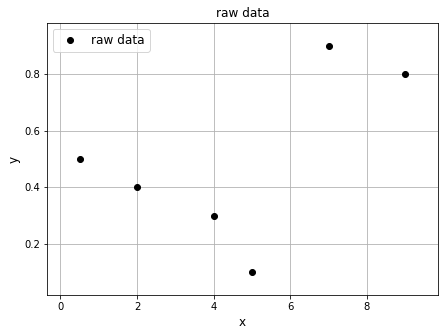

In [3]:
# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
def plot_raw_data(x, y, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(x, y, 'ko', label='raw data')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True)
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
# overlay raw data
plot_raw_data(x,y,ax1)
ax1.legend(loc="best", fontsize=12)
ax1.set_title("raw data", fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

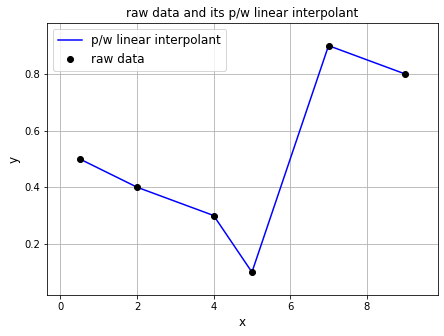

In [4]:
# 线性插值
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

ax1.plot(x,y,"b", label="p/w linear interpolant")
plot_raw_data(x,y,ax1)
ax1.legend(loc="best", fontsize=12)
ax1.set_title("raw data and its p/w linear interpolant",fontsize=12)
plt.show

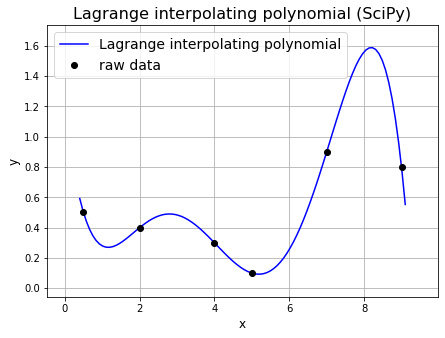

In [5]:
import scipy.interpolate as si
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])
lp = si.lagrange(xi,yi)
x = np.linspace(0.4,9.1,100)
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

ax1.plot(x,lp(x),"b",label="Lagrange interpolating polynomial")
plot_raw_data(xi,yi,ax1)
ax1.set_title("Lagrange interpolating polynomial (SciPy)",fontsize=16)
ax1.legend(loc="best",fontsize=14)
plt.show()


In [6]:
#牛顿插值
def calculate_newton_poly_coeffs(xi,yi):
    a = yi.copy()
    N = len(a) -1 
    for k in range(1,N+1):
        for i in range(k,N+1):
            a[i] = (a[i] - a[k-1])/(xi[i] - xi[k-1])
    return a

In [7]:
def eval_newton_poly(a,xi,x):
    N = len(xi) - 1
    P = a[N]
    for k in range(1,N+1):
        P = a[N-k] + (x - xi[N-k]) * P
    return P

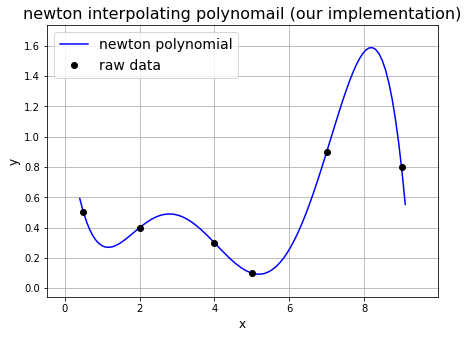

In [8]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

a = calculate_newton_poly_coeffs(xi,yi)
x = np.linspace(0.4,9.1,100)
ax1.plot(x,eval_newton_poly(a,xi,x), "b", label="newton polynomial")

plot_raw_data(xi,yi,ax1)
ax1.set_title("newton interpolating polynomail (our implementation)", fontsize=16)
ax1.legend(loc="best", fontsize=14)
plt.show()


In [9]:
p = np.polyfit(xi, yi, deg=4, rcond=None, full=False, w=None, cov=False)
p


array([-0.00420655,  0.07403681, -0.38492428,  0.59251888,  0.27906056])

In [10]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (x, y) data from above
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# Use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)
#y = 0.0508x + 0.2671

poly_coeffs:  [0.0508044  0.26714649]


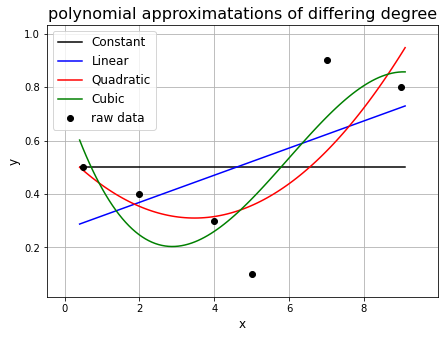

In [11]:
xi = np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi = np.array([0.5,0.4,0.3,0.1,0.9,0.8])

poly_coeffs = np.polyfit(xi,yi,0)
p0 = np.poly1d(poly_coeffs)
poly_coeffs = np.polyfit(xi,yi,1)
p1 = np.poly1d(poly_coeffs)
poly_coeffs = np.polyfit(xi,yi,2)
p2 = np.poly1d(poly_coeffs)
poly_coeffs = np.polyfit(xi,yi,3)
p3 = np.poly1d(poly_coeffs)
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4,9.1,100)
ax1.plot(x,p0(x),"k",label="Constant")
ax1.plot(x,p1(x),"b",label="Linear")
ax1.plot(x,p2(x),"r",label="Quadratic")
ax1.plot(x,p3(x),"g",label="Cubic")
plot_raw_data(xi,yi,ax1)
ax1.legend(loc="best",fontsize=12)
ax1.set_title("polynomial approximatations of differing degree", fontsize=16)
plt.show()

In [12]:
def sqr_error(p,xi,yi):
    diff2 = (p(xi) - yi)**2
    return diff2.sum()
    

print("Constant fit error = ", sqr_error(p0,xi,yi))
print("Linear fit error = ", sqr_error(p0,xi,yi))
print("Quadratic fit error = ", sqr_error(p0,xi,yi))
print("Cubic fit error = ", sqr_error(p0,xi,yi))

Constant fit error =  0.4600000000000001
Linear fit error =  0.4600000000000001
Quadratic fit error =  0.4600000000000001
Cubic fit error =  0.4600000000000001


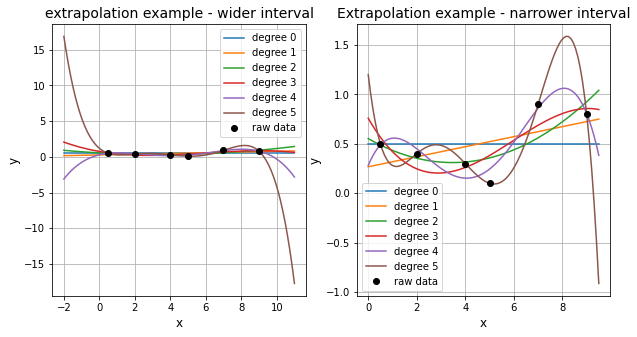

In [13]:
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

N = 6
poly_coeffs = np.zeros((N,N))
for i in range(N):
    poly_coeffs[i,:(i+1)] = np.polyfit(xi,yi,i)
x1 = np.linspace(-2.,11.,100)
x2 = np.linspace(0.,9.5,100)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
    p = np.poly1d(poly_coeffs[i,:(i+1)])
    ax1.plot(x1,p(x1),label="degree %i" %i)

#overlay raw data
plot_raw_data(xi,yi,ax1)
ax1.legend(loc="best")
ax1.set_title("extrapolation example - wider interval", fontsize=14)

for i in range(N):
    p = np.poly1d(poly_coeffs[i,:(i+1)])
    ax2.plot(x2,p(x2),label="degree %i" %i)
plot_raw_data(xi,yi,ax2)
ax2.legend(loc="best")
ax2.set_title("Extrapolation example - narrower interval", fontsize=14)
plt.show()